# Imports

In [1]:
%load_ext autoreload
%autoreload 2

# generic
import time
import pickle
import itertools as it
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
colors = [x['color'] for x in plt.style.library['seaborn']['axes.prop_cycle']]
from mpl_toolkits import mplot3d

# load the model module
from HighFreqIncProcess import HighFreqIncProcessClass
import estimate
import fit
from labels import latex

**Set various settings:**

In [2]:
LOAD = False # load baseline

In [9]:
DO_RHO99 = True # load rho=0.95
DO_RHOHALF = True # load rho=0.5
DO_NOPSI = True # load psi=0.0
DO_NOXI = True # load xi=0.0

LOAD_RHO99 = LOAD # load rho=1
LOAD_RHOHALF = LOAD # load rho=0.5

LOAD_NOPSI = LOAD # load psi_t=0.0
LOAD_NOXI = LOAD # load xi_t=0.0

In [4]:
SAMPLE = 'all' # data sample used
ws = 'w' # windsorizing 'w' or not ''
ks = [1,2,3,4,5,6] # lags used

# Estimation - Baseline

In [5]:
# a. setup
par = {} # changes to baseline parameters
model_baseline = HighFreqIncProcessClass(name='baseline',par=par)
model_baseline.latexname = 'baseline'

# b. moment specifications and estimation parameters
model_baseline.set_specs(ws=ws)
model_baseline.set_theta()

# c. load data
model_baseline.load_data(sample=SAMPLE)

# c. weighting
model_baseline.par.use_equal_weighting = False

# d. prepare estimation
model_baseline.prepare_estimation()

**Estimate:**

In [6]:
model_baseline.multistart_estimation(load=LOAD)

total time: 29min 11s (avg. cpu load: 34.8)


**Apply best:**

In [7]:
model_baseline.show_multistart(N=10)
print('')
model_baseline.apply_multistart()
print('')
model_baseline.est_results()

            obj      p_phi      p_psi      p_eta       p_xi  sigma_phi  sigma_psi  sigma_eta   sigma_xi        rho     mu_phi      mu_xi    nits
  0:   1.34992474      0.146      0.008      0.071      0.206      0.015      0.198      0.646      0.122     -0.000      0.012      0.085  [   90]
  1:   1.34992486      0.146      0.008      0.071      0.206      0.015      0.198      0.646      0.122      0.000      0.012      0.085  [  101]
  2:   1.34992492      0.146      0.008      0.071      0.206      0.015      0.198      0.646      0.122      0.000      0.012      0.085  [   46]
  3:   1.34992914      0.146      0.008      0.071      0.206      0.015      0.198      0.646      0.122      0.000      0.012      0.085  [   60]
  4:   1.34997158      0.146      0.008      0.071      0.206      0.015      0.199      0.646      0.122      0.005      0.012      0.085  [   45]
  5:   1.49381314      0.137      0.010      0.210      0.072      0.014      0.176      0.129      0.516      0.00

# Estimation - alternative

In [10]:
if DO_RHO99:
    model_rho99 = model_baseline.copy(name='rho99')
    model_rho99.latexname = r'$\rho = 0.99$'
    model_rho99.par.rho = 0.99
    del model_rho99.theta['rho']
    model_rho99.multistart_estimation(load=LOAD_RHO99)
    model_rho99.show_multistart(N=10)
    print('')
    model_rho99.apply_multistart()
    print('')
    model_rho99.est_results()

total time: 17min 51s (avg. cpu load: 100.0)
            obj      p_phi      p_psi      p_eta       p_xi  sigma_phi  sigma_psi  sigma_eta   sigma_xi     mu_phi      mu_xi    nits
  0:   1.36279589      0.146      0.009      0.072      0.204      0.015      0.253      0.643      0.123      0.012      0.086  [   79]
  1:   1.36280066      0.147      0.009      0.073      0.204      0.015      0.253      0.643      0.123      0.012      0.086  [   62]
  2:   1.36280069      0.147      0.009      0.073      0.204      0.015      0.253      0.643      0.123      0.012      0.086  [   89]
  3:   1.36280070      0.147      0.009      0.073      0.204      0.015      0.253      0.643      0.123      0.012      0.086  [   64]
  4:   1.36280073      0.147      0.009      0.073      0.204      0.015      0.253      0.643      0.123      0.012      0.086  [   68]
  5:   1.36280088      0.147      0.009      0.073      0.204      0.015      0.253      0.643      0.123      0.012      0.086  [   57]

In [11]:
if DO_RHOHALF:
    model_rhohalf = model_baseline.copy(name='rhohalf')
    model_rhohalf.latexname = r'$\rho = 0.5$'
    model_rhohalf.par.rho = 0.5
    del model_rhohalf.theta['rho']
    model_rhohalf.multistart_estimation(load=LOAD_RHOHALF)
    model_rhohalf.show_multistart(N=10)
    print('')
    model_rhohalf.apply_multistart()
    print('')
    model_rhohalf.est_results()

total time: 35min 14s (avg. cpu load: 99.8)
            obj      p_phi      p_psi      p_eta       p_xi  sigma_phi  sigma_psi  sigma_eta   sigma_xi     mu_phi      mu_xi    nits
  0:   1.35531123      0.146      0.009      0.072      0.205      0.015      0.231      0.645      0.122      0.012      0.086  [   78]
  1:   1.35531146      0.146      0.009      0.072      0.205      0.015      0.231      0.645      0.122      0.012      0.086  [   48]
  2:   1.35531293      0.146      0.009      0.072      0.205      0.015      0.231      0.645      0.122      0.012      0.086  [  102]
  3:   1.49821926      0.137      0.010      0.208      0.074      0.014      0.203      0.129      0.517      0.012      0.424  [   36]
  4:   1.49822102      0.137      0.010      0.208      0.074      0.014      0.203      0.129      0.516      0.012      0.424  [   53]
  5:   1.49822349      0.137      0.010      0.208      0.074      0.014      0.203      0.129      0.517      0.012      0.424  [   27]


In [12]:
if DO_NOPSI:
    model_nopsi = model_baseline.copy(name='nopsi')
    model_nopsi.latexname = r'$\psi_t = 0$'
    model_nopsi.par.p_psi = 0.0
    model_nopsi.par.sigma_psi = 0.0
    model_nopsi.par.rho = 0.0
    del model_nopsi.theta['p_psi']
    del model_nopsi.theta['sigma_psi']
    del model_nopsi.theta['rho']
    model_nopsi.multistart_estimation(load=LOAD_NOPSI)
    model_nopsi.show_multistart(N=10)
    print('')
    model_nopsi.apply_multistart()
    print('')
    model_nopsi.est_results()  

total time: 2min 51s (avg. cpu load: 53.9)
            obj      p_phi      p_eta       p_xi  sigma_phi  sigma_eta   sigma_xi     mu_phi      mu_xi    nits
  0:   4.87073630      0.159      0.091      0.165      0.024      0.583      0.141      0.011      0.162  [   16]
  1:   4.87073657      0.159      0.091      0.165      0.024      0.583      0.141      0.011      0.162  [   31]
  2:   4.87074146      0.159      0.092      0.165      0.024      0.582      0.141      0.011      0.162  [   24]
  3:   4.87074944      0.159      0.092      0.165      0.024      0.582      0.141      0.011      0.162  [   26]
  4:   4.87074944      0.159      0.092      0.165      0.024      0.582      0.141      0.011      0.162  [   16]
  5:   4.87074945      0.159      0.092      0.165      0.024      0.582      0.141      0.011      0.162  [   43]
  6:   4.87074957      0.159      0.092      0.165      0.024      0.582      0.141      0.011      0.162  [   22]
  7:   4.87074958      0.159      0.092 

In [13]:
if DO_NOXI:
    model_noxi = model_baseline.copy(name='noxi')
    model_noxi.latexname = r'$\xi_t = 0$'
    model_noxi.par.p_xi = 0.0
    model_noxi.par.sigma_xi = 0.0
    model_noxi.par.mu_xi = 0.0
    del model_noxi.theta['p_xi']
    del model_noxi.theta['sigma_xi']
    del model_noxi.theta['mu_xi']
    model_noxi.multistart_estimation(load=LOAD_NOXI)
    model_noxi.show_multistart(N=10)
    print('')
    model_noxi.apply_multistart()
    print('')
    model_noxi.est_results()

total time: 17min 30s (avg. cpu load: 21.4)
            obj      p_phi      p_psi      p_eta  sigma_phi  sigma_psi  sigma_eta        rho     mu_phi    nits
  0:   4.41315279      0.158      0.003      0.237      0.019      0.424      0.281     -0.000      0.011  [   33]
  1:   4.41315286      0.158      0.003      0.237      0.019      0.424      0.281     -0.000      0.011  [   68]
  2:   4.41315288      0.158      0.003      0.237      0.019      0.424      0.281      0.000      0.011  [   73]
  3:   4.41315370      0.158      0.003      0.237      0.019      0.424      0.281      0.000      0.011  [   51]
  4:   4.41315373      0.158      0.003      0.237      0.019      0.424      0.281     -0.000      0.011  [   65]
  5:   4.41315418      0.158      0.003      0.237      0.019      0.424      0.281      0.000      0.011  [   19]
  6:   4.41315774      0.158      0.003      0.237      0.019      0.424      0.281     -0.000      0.011  [   55]
  7:   4.41315774      0.158      0.003

# Compare data and model moments

In [14]:
models = [model_baseline]
if DO_RHO99: models.append(model_rho99)
if DO_RHOHALF: models.append(model_rhohalf)
if DO_NOPSI: models.append(model_nopsi)
if DO_NOXI: models.append(model_noxi)

In [15]:
fit.estimation_results(model_baseline,models)

## Mean, variance, and kurtosis

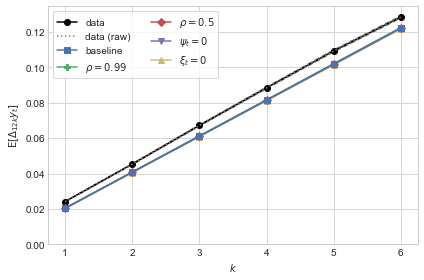

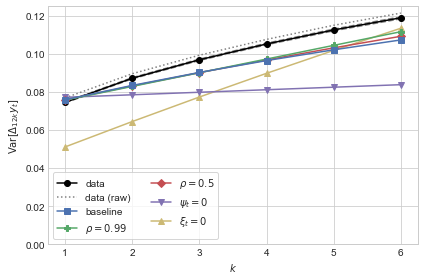

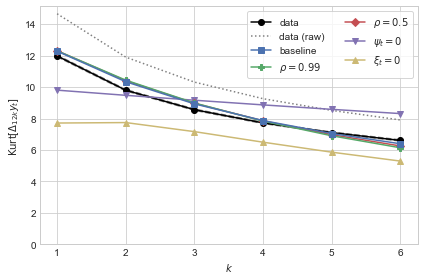

In [16]:
for momname in [f'mean_d12ky{ws}',f'var_d12ky{ws}',f'kurt_d12ky{ws}']:
    if momname in model_baseline.specs:
        fit.mean_var_skew_kurt(models,momname,savefig=True)

## Auto-covariances

### Full

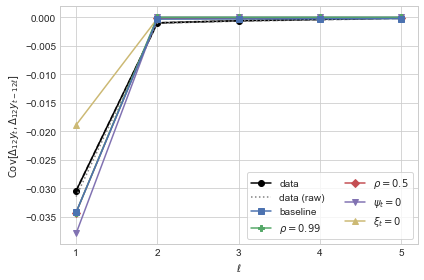

In [17]:
fit.auto_cov(models,f'd12y{ws}12l',savefig=True)

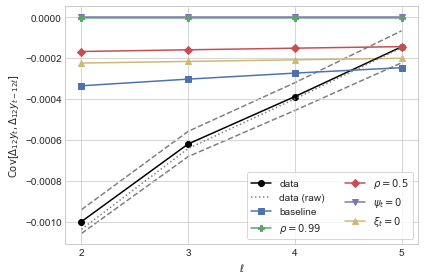

In [18]:
fit.auto_cov(models,f'd12y{ws}12l',zoom=True,savefig=True)

### Fractional

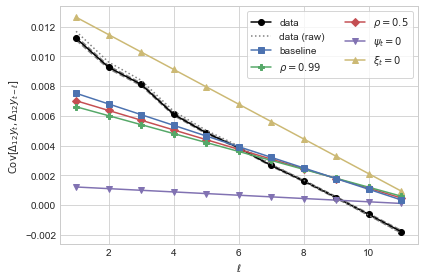

In [19]:
fit.frac_auto_cov(models,f'd12y{ws}1l',savefig=True)

## Levels

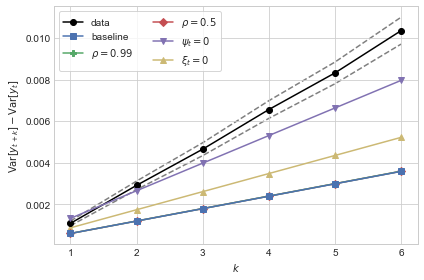

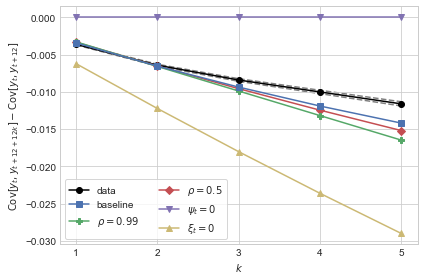

In [20]:
for momname in ['var_y_d12_diff','cov_y_y_d12_diff']:
    fit.var_diff_level(models,momname,savefig=True)

## CDFs

**Prepare:**

In [21]:
cdfmodels = fit.prepare_cdf(models,ks,sample=SAMPLE)

**Unconditional CDF:**

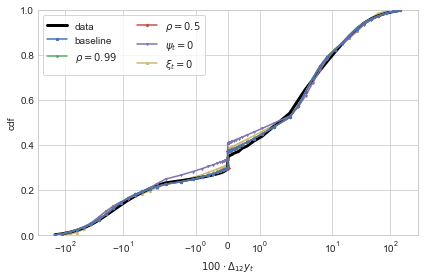

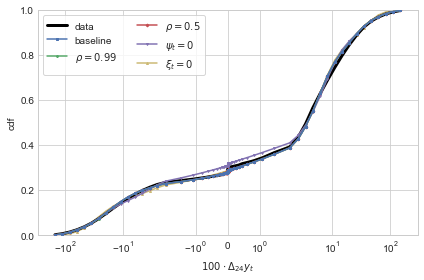

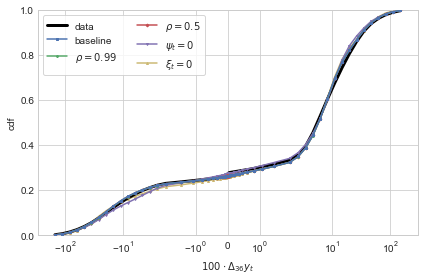

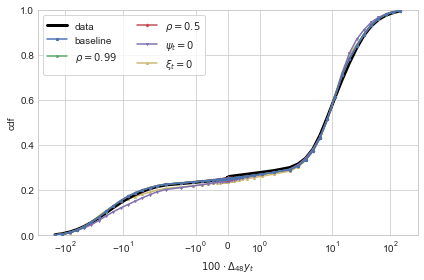

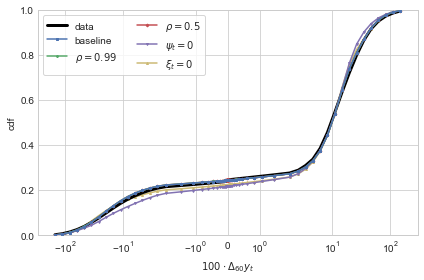

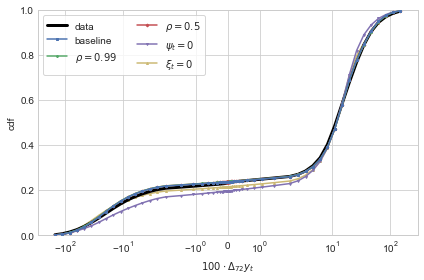

In [22]:
for k in ks:
    fit.cdf(cdfmodels,'d12ky',k,savefig=True)

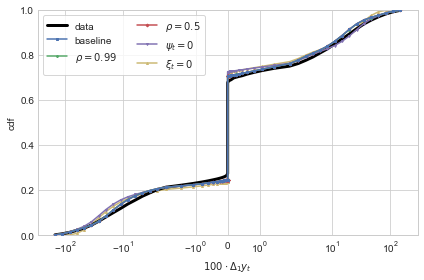

In [23]:
fit.cdf(cdfmodels,'d1ky',1,savefig=True)

**Conditional CDF:**

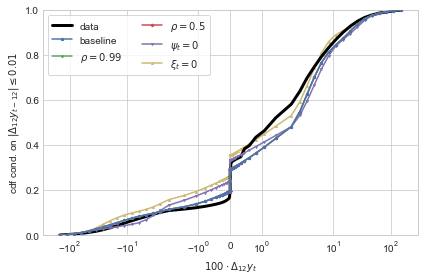

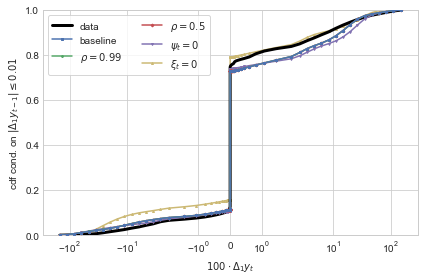

In [24]:
fit.cdf_midrange(cdfmodels,'d12ky',savefig=True)
fit.cdf_midrange(cdfmodels,'d1ky',savefig=True)

# Checks

In [25]:
model =  model_baseline

In [26]:
simmodel = model.copy(par={'use_theoretical':False})
simmodel.par.kmax = 10
simmodel.setup_simulation()
simmodel.simulate()
simmodel.calc_moments()

In [27]:
model.compare_moments(simmodel,str_self='theoretical',str_other='simultation')

mean_d12kyw [1]                         : theoretical =  0.0204, simultation =  0.0204 contribution =  0.0000
mean_d12kyw [2]                         : theoretical =  0.0407, simultation =  0.0408 contribution =  0.0000
mean_d12kyw [3]                         : theoretical =  0.0611, simultation =  0.0612 contribution =  0.0000
mean_d12kyw [4]                         : theoretical =  0.0815, simultation =  0.0816 contribution =  0.0000
mean_d12kyw [5]                         : theoretical =  0.1018, simultation =  0.1021 contribution =  0.0000
mean_d12kyw [6]                         : theoretical =  0.1222, simultation =  0.1225 contribution =  0.0000
var_d12kyw [1]                          : theoretical =  0.0760, simultation =  0.0760 contribution =  0.0000
var_d12kyw [2]                          : theoretical =  0.0835, simultation =  0.0835 contribution =  0.0000
var_d12kyw [3]                          : theoretical =  0.0903, simultation =  0.0903 contribution =  0.0000
var_d12kyw